<a href="https://colab.research.google.com/github/SaashaJoshi/deep-learning-architectures/blob/master/text-classification/text_classification_ktrain_bert_kaggle_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Supervised Learning code for Disaster Tweet Classification**

✔✔✔

Installing the libraries


**Multiclass Text Classification Using BERT and Keras****
we will use ktrain (a lightweight wrapper around Keras) to build a model using the dataset employed in the scikit-learn tutorial: Working with Text Data.The objective is to accurately classify each text into one of these 2 classes. This will provide us an opportunity to see BERT in action on a relatively smaller training set.

In [ ]:
# install ktrain
!pip3 install -q ktrain

     |████████████████████████████████| 25.3 MB 1.3 MB/s 
     |████████████████████████████████| 981 kB 29.7 MB/s 
     |████████████████████████████████| 265 kB 20.8 MB/s 
     |████████████████████████████████| 3.8 MB 29.3 MB/s 
     |████████████████████████████████| 1.3 MB 62.5 MB/s 
     |████████████████████████████████| 468 kB 57.5 MB/s 
     |████████████████████████████████| 880 kB 9.7 MB/s 
     |████████████████████████████████| 7.6 MB 19.1 MB/s 
     |████████████████████████████████| 182 kB 66.9 MB/s 


In [ ]:
!pip uninstall keras
!pip uninstall tensorflow
!pip uninstall ktrain

Found existing installation: Keras 2.2.4
Uninstalling Keras-2.2.4:
  Would remove:
    /usr/local/lib/python3.8/dist-packages/Keras-2.2.4.dist-info/*
    /usr/local/lib/python3.8/dist-packages/docs/*
    /usr/local/lib/python3.8/dist-packages/keras/*
  Would not remove (might be manually added):
    /usr/local/lib/python3.8/dist-packages/docs/md_autogen.py
    /usr/local/lib/python3.8/dist-packages/docs/update_docs.py
Proceed (y/n)? y
  Successfully uninstalled Keras-2.2.4
Found existing installation: tensorflow 2.11.0
Uninstalling tensorflow-2.11.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.8/dist-packages/tensorflow-2.11.0.dist-info/*
    /usr/local/lib/python3.8/dist-packages/tensorflow/*
Proceed (y/n)? y


In [ ]:
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached keras-2.11.0-py2.py3-none-any.whl (1.7 MB)


In [ ]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached tensorflow-2.11.0-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (588.3 MB)


### Importing Libraries


In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd

### Reading training file

In [ ]:

train_df = pd.read_csv("train_set_0520.csv")
test_df = pd.read_csv("test_set_0520.csv")

In [ ]:
train_df.head()

,ID,type,path_to_file,begin_line,link_to_comment,comment,non-information
0,FR587,Javadoc,https://github.com/nnovielli/jabref/blob/maste...,151,https://github.com/nnovielli/jabref/blob/maste...,@implNote taken from {@link com.sun.javafx.sce...,yes
1,FR974,Line,https://github.com/nnovielli/jabref/blob/maste...,95,https://github.com/nnovielli/jabref/blob/maste...,icon.setToolTipText(printedViewModel.getLocali...,yes
2,FR1359,Line,https://github.com/nnovielli/jabref/blob/maste...,45,https://github.com/nnovielli/jabref/blob/maste...,Synchronize changes of the underlying date val...,no
3,FR30,Javadoc,https://github.com/nnovielli/jabref/blob/maste...,1102,https://github.com/nnovielli/jabref/blob/maste...,Ask if the user really wants to close the give...,yes
4,FR774,Block,https://github.com/nnovielli/jabref/blob/maste...,227,https://github.com/nnovielli/jabref/blob/maste...,css: information *,no


In [ ]:
train_df.drop_duplicates()
train_df

,ID,type,path_to_file,begin_line,link_to_comment,comment,non-information
0,FR587,Javadoc,https://github.com/nnovielli/jabref/blob/maste...,151,https://github.com/nnovielli/jabref/blob/maste...,@implNote taken from {@link com.sun.javafx.sce...,yes
1,FR974,Line,https://github.com/nnovielli/jabref/blob/maste...,95,https://github.com/nnovielli/jabref/blob/maste...,icon.setToolTipText(printedViewModel.getLocali...,yes
2,FR1359,Line,https://github.com/nnovielli/jabref/blob/maste...,45,https://github.com/nnovielli/jabref/blob/maste...,Synchronize changes of the underlying date val...,no
3,FR30,Javadoc,https://github.com/nnovielli/jabref/blob/maste...,1102,https://github.com/nnovielli/jabref/blob/maste...,Ask if the user really wants to close the give...,yes
4,FR774,Block,https://github.com/nnovielli/jabref/blob/maste...,227,https://github.com/nnovielli/jabref/blob/maste...,css: information *,no
...,...,...,...,...,...,...,...
1306,FR966,Line,https://github.com/nnovielli/jabref/blob/maste...,71,https://github.com/nnovielli/jabref/blob/maste...,icon.setToolTipText(qualityViewModel.getLocali...,yes
1307,FR968,Line,https://github.com/nnovielli/jabref/blob/maste...,77,https://github.com/nnovielli/jabref/blob/maste...,icon.setToolTipText(rankViewModel.getLocalizat...,yes
1308,FR97,Line,https://github.com/nnovielli/jabref/blob/maste...,54,https://github.com/nnovielli/jabref/blob/maste...,Init preferences,yes
1309,FR981,Line,https://github.com/nnovielli/jabref/blob/maste...,78,https://github.com/nnovielli/jabref/blob/maste...,"TODO: reflective access, should be removed",no


In [ ]:
for i in range(1311):
  if train_df['non-information'][i] == 'yes':
    train_df['non-information'][i] = 1
  else:
    train_df['non-information'][i] = 0

<ipython-input-6-538353cd6d67>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['non-information'][i] = 1
<ipython-input-6-538353cd6d67>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['non-information'][i] = 0


In [ ]:
train_df['non-information']

0       1
1       1
2       0
3       1
4       0
       ..
1306    1
1307    1
1308    1
1309    0
1310    1
Name: non-information, Length: 1311, dtype: object

In [ ]:
train_df.insert(loc=7, 
                column='information',
                value=train_df["non-information"])

In [ ]:
train_df.head()

,ID,type,path_to_file,begin_line,link_to_comment,comment,non-information,information
0,FR587,Javadoc,https://github.com/nnovielli/jabref/blob/maste...,151,https://github.com/nnovielli/jabref/blob/maste...,@implNote taken from {@link com.sun.javafx.sce...,1,1
1,FR974,Line,https://github.com/nnovielli/jabref/blob/maste...,95,https://github.com/nnovielli/jabref/blob/maste...,icon.setToolTipText(printedViewModel.getLocali...,1,1
2,FR1359,Line,https://github.com/nnovielli/jabref/blob/maste...,45,https://github.com/nnovielli/jabref/blob/maste...,Synchronize changes of the underlying date val...,0,0
3,FR30,Javadoc,https://github.com/nnovielli/jabref/blob/maste...,1102,https://github.com/nnovielli/jabref/blob/maste...,Ask if the user really wants to close the give...,1,1
4,FR774,Block,https://github.com/nnovielli/jabref/blob/maste...,227,https://github.com/nnovielli/jabref/blob/maste...,css: information *,0,0


In [ ]:
for i in range(1311):
  if train_df['non-information'][i] == 1:
    train_df["information"][i] = 0
  elif train_df["non-information"][i] == 0:
    train_df["information"][i] = 1

<ipython-input-10-553de1c95057>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["information"][i] = 0
<ipython-input-10-553de1c95057>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["information"][i] = 1


In [ ]:
train_df.head()

,ID,type,path_to_file,begin_line,link_to_comment,comment,non-information,information
0,FR587,Javadoc,https://github.com/nnovielli/jabref/blob/maste...,151,https://github.com/nnovielli/jabref/blob/maste...,@implNote taken from {@link com.sun.javafx.sce...,1,0
1,FR974,Line,https://github.com/nnovielli/jabref/blob/maste...,95,https://github.com/nnovielli/jabref/blob/maste...,icon.setToolTipText(printedViewModel.getLocali...,1,0
2,FR1359,Line,https://github.com/nnovielli/jabref/blob/maste...,45,https://github.com/nnovielli/jabref/blob/maste...,Synchronize changes of the underlying date val...,0,1
3,FR30,Javadoc,https://github.com/nnovielli/jabref/blob/maste...,1102,https://github.com/nnovielli/jabref/blob/maste...,Ask if the user really wants to close the give...,1,0
4,FR774,Block,https://github.com/nnovielli/jabref/blob/maste...,227,https://github.com/nnovielli/jabref/blob/maste...,css: information *,0,1


In [ ]:
# train_df = train_df.drop("ID", 1)
train_df = train_df.drop("path_to_file", 1)
train_df = train_df.drop("type", 1)
train_df = train_df.drop("begin_line", 1)
train_df = train_df.drop("link_to_comment", 1)

<ipython-input-12-079ea4c70694>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  train_df = train_df.drop("path_to_file", 1)
<ipython-input-12-079ea4c70694>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  train_df = train_df.drop("type", 1)
<ipython-input-12-079ea4c70694>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  train_df = train_df.drop("begin_line", 1)
<ipython-input-12-079ea4c70694>:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  train_df = train_df.drop("link_to_comment", 1)


In [ ]:
train_df.head()

,ID,comment,non-information,information
0,FR587,@implNote taken from {@link com.sun.javafx.sce...,1,0
1,FR974,icon.setToolTipText(printedViewModel.getLocali...,1,0
2,FR1359,Synchronize changes of the underlying date val...,0,1
3,FR30,Ask if the user really wants to close the give...,1,0
4,FR774,css: information *,0,1


In [ ]:
test_df.head()

,ID,type,path_to_file,begin_line,link_to_comment,comment,Expected
0,375,Line,https://github.com/nnovielli/jabref/blob/maste...,146,https://github.com/nnovielli/jabref/blob/maste...,... xxx todo: add standard entries,NaN
1,376,Line,https://github.com/nnovielli/jabref/blob/maste...,52,https://github.com/nnovielli/jabref/blob/maste...,"""clean"" url is decoded value of ""url"" parameter",NaN
2,377,Line,https://github.com/nnovielli/jabref/blob/maste...,136,https://github.com/nnovielli/jabref/blob/maste...,(Only) after a successful save the following s...,NaN
3,378,Javadoc,https://github.com/nnovielli/jabref/blob/maste...,8,https://github.com/nnovielli/jabref/blob/maste...,{@link EntryAddedEvent} is fired when a new {@...,NaN
4,379,Line,https://github.com/nnovielli/jabref/blob/maste...,736,https://github.com/nnovielli/jabref/blob/maste...,@formatter:off,NaN


In [ ]:
test_df = test_df.drop("Expected", 1)

<ipython-input-15-43c40a00e10d>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  test_df = test_df.drop("Expected", 1)


In [ ]:
test_df.insert(loc=6, 
                column='non-information',
                value=None)

test_df.insert(loc=7, 
                column='information',
                value=None)

In [ ]:
# test_df = test_df.drop("ID", 1)
test_df = test_df.drop("type", 1)
test_df = test_df.drop("path_to_file", 1)
test_df = test_df.drop("begin_line", 1)
test_df = test_df.drop("link_to_comment", 1)

<ipython-input-17-653846297254>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  test_df = test_df.drop("type", 1)
<ipython-input-17-653846297254>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  test_df = test_df.drop("path_to_file", 1)
<ipython-input-17-653846297254>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  test_df = test_df.drop("begin_line", 1)
<ipython-input-17-653846297254>:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  test_df = test_df.drop("link_to_comment", 1)


In [ ]:
test_df.head()

,ID,comment,non-information,information
0,375,... xxx todo: add standard entries,None,None
1,376,"""clean"" url is decoded value of ""url"" parameter",None,None
2,377,(Only) after a successful save the following s...,None,None
3,378,{@link EntryAddedEvent} is fired when a new {@...,None,None
4,379,@formatter:off,None,None


In [ ]:
train_df.to_csv('train.zip', index=False)
test_df.to_csv('test.zip', index=False)  

In [ ]:
train_df.to_csv('train.csv', index=False)
test_df.to_csv('test.csv', index=False)  

In [ ]:
# train_df = train_df.to_numpy()
# train_df

### Splitting training data in to training and validation data

In [ ]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [ ]:
random_seed = 12342
x_train, x_val, y_train, y_val = train_test_split(train_df['comment'], train_df['non-information'], shuffle=True, test_size = 0.2, random_state=random_seed, stratify=train_df['non-information'])

In [ ]:
# random_seed = 12342
# # x_train, x_val, y_train, y_val = train_test_split(train_df['comment'], train_df['non-information'])

# x_train, y_train = train_df['comment'], train_df['non-information']
# x_val, y_val = test_df['comment'], test_df['Expected']

In [ ]:
type(train_df['comment'][1])

str

**Convert data to features for BERT**
# **Load and Preprocess the Data**
Preprocess the data using the texts_from_array function (since the data resides in an array). If your documents are stored in folders or a CSV file you can use the texts_from_folder or texts_from_csv functions, respectively.

In [ ]:
import ktrain
from ktrain import text

In [ ]:
type(x_train)

pandas.core.series.Series

In [ ]:
x_train = x_train.to_numpy()

In [ ]:
y_train = y_train.to_numpy()

In [ ]:
type(y_train)

numpy.ndarray

In [ ]:
x_val = x_val.to_numpy()

In [ ]:
y_val = y_val.to_numpy()

In [ ]:
!pip install -q keras-bert

In [ ]:
# from keras.models import bert
# import keras-bert

In [ ]:
# (x_train_bert,  y_train_bert), (x_val_bert, y_val_bert), preproc = text.texts_from_csv(x_train, y_train,
#                                                                                        x_test = x_val, y_test=y_val,
#                                                                                        class_names= ["0", "1"],
#                                                                                        preprocess_mode='bert',
#                                                                                        maxlen=65, 
#                                                                                        max_features=35000)

TypeError: ignored

In [ ]:
import keras

In [ ]:
DATA_PATH = 'train.zip'
NUM_WORDS = 50000
MAXLEN = 150
(x_train, y_train), (x_test, y_test), preproc = text.texts_from_csv(DATA_PATH,
                                                                    'comment',
                                                                    label_columns = ["non-information", "information"],
                                                                    # val_filepath=None, # if None, 10% of data will be used for validation,
                                                                    preprocess_mode = 'standard', 
                                                                    max_features=NUM_WORDS, maxlen=MAXLEN,
                                                                    ngram_range=1)

AttributeError: ignored

In [ ]:
# trn, val, preproc = text.texts_from_array(x_train, y_train,
#                                           x_test = x_val, y_test=y_val,
#                                           class_names= ["0", "1"],
#                                           ngram_range=1, 
#                                           maxlen=300, 
#                                           max_features=50000)

In [ ]:
(x_train_bert, y_train_bert), (x_val_bert, y_val_bert), preproc = text.texts_from_df(train_df, 
                                                                   'comment', # name of column containing review text
                                                                   label_columns=["non-information", "information"],
                                                                   maxlen=75, 
                                                                   max_features=100000,
                                                                   preprocess_mode='bert',
                                                                  #  val_pct=0.1,
                                                                   ngram_range=3)

['non-information', 'information']
     non-information  information
337                1            0
926                1            0
162                0            1
99                 0            1
512                0            1
['non-information', 'information']
     non-information  information
847                0            1
799                1            0
826                0            1
999                1            0
469                0            1
preprocessing train...
language: en


Is Multi-Label? False
preprocessing test...
language: en


# STEP 2: Load the BERT Model and Instantiate a Learner object
**Create Model Instance and train it for 6 epochs
**
# STEP 3: Train the Model
We train using one of the three learning rates recommended in the BERT paper: 5e-5, 3e-5, or 2e-5. Alternatively, the ktrain Learning Rate Finder can be used to find a good learning rate by invoking learner.lr_find() and learner.lr_plot(), prior to training. The learner.fit_onecycle method employs a 1cycle learning rate policy.



In [ ]:
model = text.text_classifier('bert', train_data=(x_train_bert, y_train_bert), preproc=preproc)
learner = ktrain.get_learner(model, train_data=(x_train_bert, y_train_bert), val_data=(x_val_bert, y_val_bert), batch_size=32)

Is Multi-Label? False
maxlen is 75
done.


In [ ]:
learner.lr_find()             # briefly simulate training to find good learning rate   

simulating training for different learning rates... this may take a few moments...


/usr/local/lib/python3.8/dist-packages/ktrain/core.py:609: UserWarning: max_epochs is being set to 5 since steps per epoch is small. If you wish to estimate LR using more epochs, set max_epochs manually.
  warnings.warn(


Epoch 1/5
37/37 [==============================] - 38s 504ms/step - loss: 0.7388 - accuracy: 0.4716
Epoch 2/5
37/37 [==============================] - 19s 521ms/step - loss: 0.4841 - accuracy: 0.7617
Epoch 3/5
37/37 [==============================] - 19s 510ms/step - loss: 0.5923 - accuracy: 0.7116
Epoch 4/5
37/37 [==============================] - 17s 456ms/step - loss: 8.6358 - accuracy: 0.5763


done.
Please invoke the Learner.lr_plot() method to visually inspect the loss plot to help identify the maximal learning rate associated with falling loss.


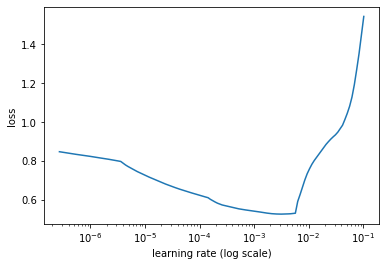

In [ ]:
learner.lr_plot()

In [ ]:
learner.autofit(1e-5)

early_stopping automatically enabled at patience=5
reduce_on_plateau automatically enabled at patience=2


begin training using triangular learning rate policy with max lr of 1e-05...
Epoch 1/1024
37/37 [==============================] - 20s 539ms/step - loss: 0.5997 - accuracy: 0.7133 - val_loss: 0.6071 - val_accuracy: 0.7045
Epoch 2/1024
37/37 [==============================] - 20s 546ms/step - loss: 0.5994 - accuracy: 0.7133 - val_loss: 0.6070 - val_accuracy: 0.7045
Epoch 3/1024
37/37 [==============================] - 19s 525ms/step - loss: 0.5997 - accuracy: 0.7133 - val_loss: 0.6070 - val_accuracy: 0.7045
Epoch 4/1024
37/37 [==============================] - ETA: 0s - loss: 0.5995 - accuracy: 0.7133
Epoch 00004: Reducing Max LR on Plateau: new max lr will be 5e-06 (if not early_stopping).
37/37 [==============================] - 19s 520ms/step - loss: 0.5995 - accuracy: 0.7133 - val_loss: 0.6070 - val_accuracy: 0.7045
Epoch 5/1024
37/37 [==============================] - 19s 521m

In [ ]:
learner.validate(val_data=(x_val_bert, y_val_bert), class_names=["non-information", "information"])

### Getting predictor variable

In [ ]:
# getting predictor variable
predictor = ktrain.get_predictor(learner.model, preproc)

In [ ]:
learner.print_layers()

0 (trainable=True) : <keras.engine.input_layer.InputLayer object at 0x7fa6c01862e0>
1 (trainable=True) : <keras.engine.input_layer.InputLayer object at 0x7fa6c0186d30>
2 (trainable=True) : <keras_bert.layers.embedding.TokenEmbedding object at 0x7fa6c0186670>
3 (trainable=True) : <keras.layers.core.embedding.Embedding object at 0x7fa6c01863d0>
4 (trainable=True) : <keras.layers.merging.add.Add object at 0x7fa6c0710490>
5 (trainable=True) : <keras_pos_embd.pos_embd.PositionEmbedding object at 0x7fa5d5e683d0>
6 (trainable=True) : <keras.layers.regularization.dropout.Dropout object at 0x7fa61680e100>
7 (trainable=True) : <keras_layer_normalization.layer_normalization.LayerNormalization object at 0x7fa6167631f0>
8 (trainable=True) : <keras_multi_head.multi_head_attention.MultiHeadAttention object at 0x7fa5d5e66760>
9 (trainable=True) : <keras.layers.regularization.dropout.Dropout object at 0x7fa5d5e66c10>
10 (trainable=True) : <keras.layers.merging.add.Add object at 0x7fa5d5e66670>
11 (trai

### Getting predictions on test data

In [ ]:
test_df = pd.read_csv("test.csv")
test_df.insert(loc=4, 
                column='result',
                value=None)

test_df.head()

,ID,comment,non-information,information,result
0,375,... xxx todo: add standard entries,NaN,NaN,None
1,376,"""clean"" url is decoded value of ""url"" parameter",NaN,NaN,None
2,377,(Only) after a successful save the following s...,NaN,NaN,None
3,378,{@link EntryAddedEvent} is fired when a new {@...,NaN,NaN,None
4,379,@formatter:off,NaN,NaN,None


In [ ]:
test_df["result"] = predictor.predict(test_df["comment"].tolist())

# test_df = test_df[["id", "target"]]

9/9 [==============================] - 1s 153ms/step


In [ ]:
test_df[:]

,ID,comment,non-information,information,result
0,375,... xxx todo: add standard entries,NaN,NaN,information
1,376,"""clean"" url is decoded value of ""url"" parameter",NaN,NaN,information
2,377,(Only) after a successful save the following s...,NaN,NaN,information
3,378,{@link EntryAddedEvent} is fired when a new {@...,NaN,NaN,information
4,379,@formatter:off,NaN,NaN,non-information
...,...,...,...,...,...
256,631,"We use some explicit casts of the form ""(T) th...",NaN,NaN,information
257,632,"Write all strings in alphabetical order, modif...",NaN,NaN,information
258,633,Write meta data.,NaN,NaN,non-information
259,634,Write preamble if there is one.,NaN,NaN,non-information


In [ ]:
test_df.insert(loc=5, 
                column='Predicted',
                value=None)
test_df.head()

,ID,comment,non-information,information,result,Predicted
0,375,... xxx todo: add standard entries,NaN,NaN,information,None
1,376,"""clean"" url is decoded value of ""url"" parameter",NaN,NaN,information,None
2,377,(Only) after a successful save the following s...,NaN,NaN,information,None
3,378,{@link EntryAddedEvent} is fired when a new {@...,NaN,NaN,information,None
4,379,@formatter:off,NaN,NaN,non-information,None


In [ ]:
test_df = test_df.drop("non-information", 1)
test_df = test_df.drop("information", 1)

In [ ]:
test_df.head()

,ID,comment,result,Predicted
0,375,... xxx todo: add standard entries,information,None
1,376,"""clean"" url is decoded value of ""url"" parameter",information,None
2,377,(Only) after a successful save the following s...,information,None
3,378,{@link EntryAddedEvent} is fired when a new {@...,information,None
4,379,@formatter:off,non-information,None


In [ ]:
for i in range(261):
  if test_df["result"][i] == "non-information":
    test_df["Predicted"][i] = "yes"
  else:
    test_df["Predicted"][i] = "no"

<ipython-input-19-6f5c96596b30>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df["Predicted"][i] = "no"
<ipython-input-19-6f5c96596b30>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df["Predicted"][i] = "yes"


In [ ]:
test_df.head()

,ID,comment,result,Predicted
0,375,... xxx todo: add standard entries,information,no
1,376,"""clean"" url is decoded value of ""url"" parameter",information,no
2,377,(Only) after a successful save the following s...,information,no
3,378,{@link EntryAddedEvent} is fired when a new {@...,information,no
4,379,@formatter:off,non-information,yes


In [ ]:
test_df = test_df.drop("result", 1)
test_df.head()

,ID,comment,Predicted
0,375,... xxx todo: add standard entries,no
1,376,"""clean"" url is decoded value of ""url"" parameter",no
2,377,(Only) after a successful save the following s...,no
3,378,{@link EntryAddedEvent} is fired when a new {@...,no
4,379,@formatter:off,yes


In [ ]:
test_df = test_df.drop("comment", 1)
test_df.head()

,ID,Predicted
0,375,no
1,376,no
2,377,no
3,378,no
4,379,yes


In [ ]:
test_df.to_csv("submisssions-64.csv", index=False)